<a href="https://colab.research.google.com/github/manoj1995madushanka/couseraTensorflow/blob/master/A_Computer_Vision_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

emport what we need

In [2]:
import tensorflow as tf
print(tf.__version__)

1.13.1


import Fashion MNIST data from keras directly

In [0]:
mnist = tf.keras.datasets.fashion_mnist

mnist contain two sets of data then loadthat two sets

In [4]:
(training_images, training_labels),(test_images,test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


then try to print out training image

training label =  9
training image =  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0 

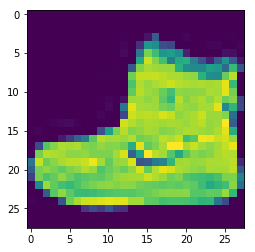

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print("training label = ",training_labels[0])
print("training image = ",training_images[0])

each value has a range 0-255 for train neural network we are easy to convert that range to 0-1 in python we can do htis without looing ( process called normalizing )

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

now we define model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding

now we compile our model with optimizer and loss function

In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2800 - acc: 0.8953
Epoch 2/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2670 - acc: 0.9010
Epoch 3/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2561 - acc: 0.9048
Epoch 4/50
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2478 - acc: 0.9071
Epoch 5/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2364 - acc: 0.9106
Epoch 6/50
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2296 - acc: 0.9153
Epoch 7/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2227 - acc: 0.9164
Epoch 8/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2167 - acc: 0.9187
Epoch 9/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2101 - acc: 0.9213
Epoch 10/50
60000/60000 [==============================] - 5s 80us/sample - loss: 

now we check accuracy of this using unseen data set caled test data

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.5193 - acc: 0.8822


[0.5193244572758675, 0.8822]